In [2]:
import kagglehub

# Download latest dataset
path = kagglehub.dataset_download("moltean/fruits")
print("Path to dataset:", path)

import os, shutil

# Delete old versions
versions_folder = os.path.dirname(path)  
versions = sorted(
    [v for v in os.listdir(versions_folder) if v.isdigit()],
    key=lambda x: int(x)
)

for v in versions[:-1]:
    shutil.rmtree(os.path.join(versions_folder, v))
    print("Deleted old version:", v)

print("Latest version retained:")


c:\Projects\Machine Learning\Fruits\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset: C:\Users\darre\.cache\kagglehub\datasets\moltean\fruits\versions\67
Latest version retained:


In [3]:
# Import basic libraries
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn

In [4]:
# Check if GPU is available
gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
    print(f"GPU available: Yes - {len(gpu_devices)} device(s)")
    for device in gpu_devices:
        print(f"  - {device}")
else:
    print("GPU available: No - using CPU")

print("Setup verification completed!")

GPU available: No - using CPU
Setup verification completed!


Print folder structure

In [5]:
import os

print("\nMain folders:")

for item in os.listdir(path):
    print(item)


Main folders:
fruits-360_100x100
fruits-360_3-body-problem
fruits-360_dataset_meta
fruits-360_multi
fruits-360_original-size


In [6]:
for split in os.listdir(path):
    split_path = os.path.join(path, split)
    
    if os.path.isdir(split_path):
        print(f"\nInside {split} folder:")
        classes = os.listdir(split_path)
        print("Number of classes:", len(classes))
        print("Sample classes:", classes[:10])


Inside fruits-360_100x100 folder:
Number of classes: 1
Sample classes: ['fruits-360']

Inside fruits-360_3-body-problem folder:
Number of classes: 1
Sample classes: ['fruits-360-3-body-problem']

Inside fruits-360_dataset_meta folder:
Number of classes: 1
Sample classes: ['fruits-360-meta']

Inside fruits-360_multi folder:
Number of classes: 3
Sample classes: ['LICENSE', 'README.md', 'test-multiple_fruits']

Inside fruits-360_original-size folder:
Number of classes: 1
Sample classes: ['fruits-360-original-size']


Image path: C:\Users\darre\.cache\kagglehub\datasets\moltean\fruits\versions\67\fruits-360_original-size\fruits-360-original-size\Training\Apple 10\r0_0.jpg
Image shape: (447, 399)
Class: Apple 10


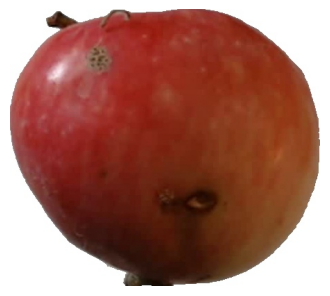

In [7]:
from PIL import Image

trainning_path = "fruits-360_original-size\\fruits-360-original-size\\Training"
testing_path  = "fruits-360_original-size\\fruits-360-original-size\\Test"

# Pick one class to test
sample_class = os.listdir(os.path.join(path, trainning_path))[0]
sample_folder = os.path.join(path, trainning_path, sample_class)

# Pick one image
sample_image = os.listdir(sample_folder)[0]
image_path = os.path.join(sample_folder, sample_image)

img = Image.open(image_path)
plt.figure(figsize=(4,4))
plt.imshow(img)
plt.axis("off")

print("Image path:", image_path)
print("Image shape:", img.size)
print("Class:", sample_class)

In [47]:
# Create datasets
import tensorflow as tf

batch_size = 32

# Resize all images to 100x100
train_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(path, trainning_path),
    image_size=(100, 100),
    batch_size=batch_size,
    label_mode='int'
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(path, testing_path),
    image_size=(100, 100), 
    batch_size=batch_size,
    label_mode='int',
    shuffle=False
)

class_names = train_ds.class_names
print("Detected classes:", class_names)
num_classes = len(class_names)
print("Number of classes:", num_classes)

Found 41278 files belonging to 116 classes.
Found 20517 files belonging to 116 classes.
Detected classes: ['Apple 10', 'Apple 11', 'Apple 12', 'Apple 13', 'Apple 14', 'Apple 17', 'Apple 18', 'Apple 19', 'Apple 5', 'Apple 7', 'Apple 8', 'Apple 9', 'Apple Core 1', 'Apple Red Yellow 2', 'Apple worm 1', 'Avocado Black 1', 'Avocado Black 2', 'Avocado Green 1', 'Banana 3', 'Banana 4', 'Beans 1', 'Blackberrie 1', 'Blackberrie 2', 'Blackberrie half rippen 1', 'Blackberrie not rippen 1', 'Cabbage red 1', 'Cactus fruit green 1', 'Cactus fruit red 1', 'Caju seed 1', 'Cherimoya 1', 'Cherry 3', 'Cherry 4', 'Cherry 5', 'Cherry Rainier 2', 'Cherry Rainier 3', 'Cherry Sour 1', 'Cherry Wax Red 2', 'Cherry Wax Red 3', 'Cherry Wax not ripen 1', 'Cherry Wax not ripen 2', 'Cucumber 1', 'Cucumber 10', 'Cucumber 11', 'Cucumber 3', 'Cucumber 4', 'Cucumber 5', 'Cucumber 6', 'Cucumber 7', 'Cucumber 8', 'Cucumber 9', 'Ginger 2', 'Gooseberry 1', 'Grape not ripen 1', 'Nectarine Flat 2', 'Nut 1', 'Nut 2', 'Nut 3', 

Print number of Images per folder in Training and Testing Sets

In [9]:
train_dir = os.path.join(path, trainning_path)

print("\nImages per class in Training set:\n")

for class_name in sorted(os.listdir(train_dir)):
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):
        image_count = len([
            f for f in os.listdir(class_path)
            if f.lower().endswith(('.png', '.jpg', '.jpeg'))
        ])

        print(f"{class_name} : {image_count} images")



Images per class in Training set:

Apple 10 : 465 images
Apple 11 : 287 images
Apple 12 : 310 images
Apple 13 : 465 images
Apple 14 : 310 images
Apple 17 : 489 images
Apple 18 : 486 images
Apple 19 : 486 images
Apple 5 : 294 images
Apple 7 : 462 images
Apple 8 : 458 images
Apple 9 : 463 images
Apple Core 1 : 314 images
Apple Red Yellow 2 : 453 images
Apple worm 1 : 465 images
Avocado Black 1 : 468 images
Avocado Black 2 : 492 images
Avocado Green 1 : 468 images
Banana 3 : 154 images
Banana 4 : 169 images
Beans 1 : 155 images
Blackberrie 1 : 300 images
Blackberrie 2 : 150 images
Blackberrie half rippen 1 : 300 images
Blackberrie not rippen 1 : 463 images
Cabbage red 1 : 99 images
Cactus fruit green 1 : 465 images
Cactus fruit red 1 : 475 images
Caju seed 1 : 151 images
Cherimoya 1 : 648 images
Cherry 3 : 465 images
Cherry 4 : 465 images
Cherry 5 : 462 images
Cherry Rainier 2 : 465 images
Cherry Rainier 3 : 458 images
Cherry Sour 1 : 304 images
Cherry Wax Red 2 : 302 images
Cherry Wax R

In [10]:
test_dir = os.path.join(path, testing_path)
print("\nImages per class in Testing set:\n")

for class_name in sorted(os.listdir(test_dir)):
    class_path = os.path.join(test_dir, class_name)

    if os.path.isdir(class_path):
        image_count = len([
            f for f in os.listdir(class_path)
            if f.lower().endswith(('.png', '.jpg', '.jpeg'))
        ])

        print(f"{class_name} : {image_count} images")


Images per class in Testing set:

Apple 10 : 231 images
Apple 11 : 142 images
Apple 12 : 154 images
Apple 13 : 231 images
Apple 14 : 154 images
Apple 17 : 243 images
Apple 18 : 242 images
Apple 19 : 241 images
Apple 5 : 146 images
Apple 7 : 229 images
Apple 8 : 228 images
Apple 9 : 231 images
Apple Core 1 : 156 images
Apple Red Yellow 2 : 225 images
Apple worm 1 : 231 images
Avocado Black 1 : 231 images
Avocado Black 2 : 246 images
Avocado Green 1 : 231 images
Banana 3 : 77 images
Banana 4 : 84 images
Beans 1 : 77 images
Blackberrie 1 : 150 images
Blackberrie 2 : 75 images
Blackberrie half rippen 1 : 150 images
Blackberrie not rippen 1 : 231 images
Cabbage red 1 : 49 images
Cactus fruit green 1 : 231 images
Cactus fruit red 1 : 237 images
Caju seed 1 : 75 images
Cherimoya 1 : 320 images
Cherry 3 : 231 images
Cherry 4 : 231 images
Cherry 5 : 228 images
Cherry Rainier 2 : 231 images
Cherry Rainier 3 : 228 images
Cherry Sour 1 : 150 images
Cherry Wax Red 2 : 150 images
Cherry Wax Red 3 :

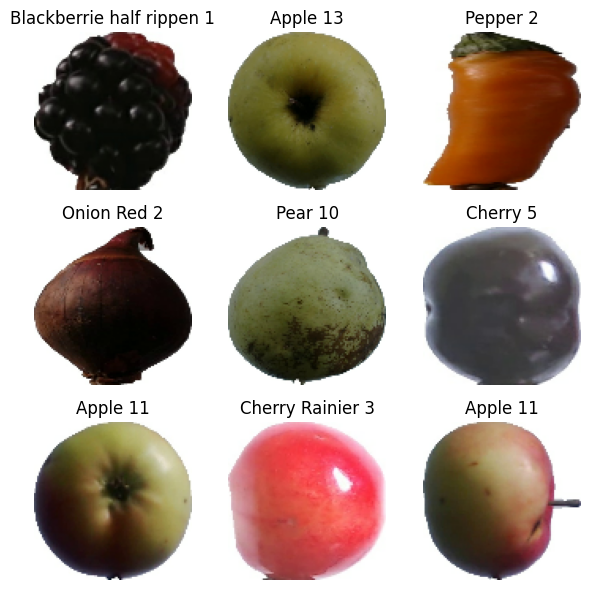

In [11]:
# Visualise some samples from the training dataset
plt.figure(figsize=(6,6))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[labels[i]])

plt.tight_layout()
plt.show()

Building Model without Image Augmentation

In [12]:
from keras import layers
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, InputLayer, Rescaling

# Early stopping callback to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.0005,
    monitor='val_loss',
    patience=12,
    restore_best_weights=True
)

# Model checkpoint callback to save the best model
no_aug_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath="best_model_no_aug.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    verbose=1
)

# Variable for convolutional block
def conv_block(filters):
    return tf.keras.Sequential([
        Conv2D(filters, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
    ])

# Define the CNN model without data augmentation
no_aug_model = tf.keras.Sequential([
    InputLayer(shape=(100, 100, 3)),
    Rescaling(1./255), # Rescale pixel values to [0, 1] range for RGB coefficients 0-255
    
    conv_block(8),
    conv_block(16),
    conv_block(32),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(num_classes, activation='softmax') 
    ])

# Display the model's summary and architecture
no_aug_model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 50, 50, 8)      │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 25, 25, 16)     │         1,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 12, 12, 32)     │         4,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 116)            │        29,812 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,216,996 (4.64 MB)

 Trainable params: 1,216,372 (4.64 MB)

 Non-trainable params: 624 (2.44 KB)

Building the Model without Data Augementation

In [13]:
#Compiling the model
no_aug_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

no_aug_history = no_aug_model.fit(
    train_ds,
    validation_data=(validation_ds),
    epochs=5, # should be 20, just to test quickly
    callbacks=[early_stopping, no_aug_checkpoint],
    verbose=1
)

Epoch 1/5


1290/1290 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7645 - loss: 1.0816
Epoch 1: val_loss improved from None to 0.03563, saving model to best_model_no_aug.keras
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 142s 104ms/step - accuracy: 0.9152 - loss: 0.3929 - val_accuracy: 0.9920 - val_loss: 0.0356
Epoch 2/5
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9947 - loss: 0.0297
Epoch 2: val_loss improved from 0.03563 to 0.00547, saving model to best_model_no_aug.keras
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 145s 112ms/step - accuracy: 0.9953 - loss: 0.0262 - val_accuracy: 0.9998 - val_loss: 0.0055
Epoch 3/5
1288/1290 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9942 - loss: 0.0263
Epoch 3: val_loss did not improve from 0.00547
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 89s 69ms/step - accuracy: 0.9940 - loss: 0.0262 - val_accuracy: 0.9966 - val_loss: 0.0109
Epoch 4/5
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9941 - loss: 0.0229
Epoch 4: val_loss did not improve from 0.00547
1290/1290 ━━━━━━

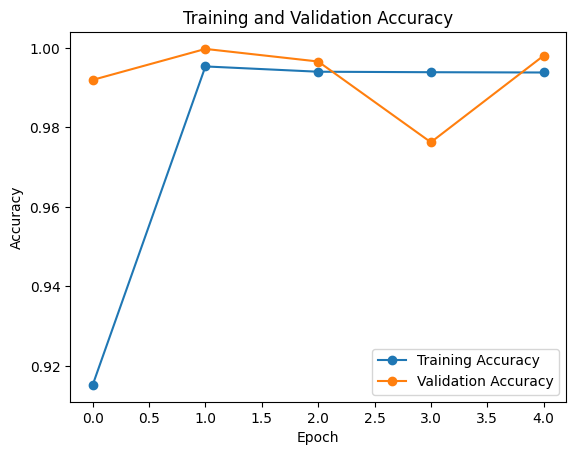

In [14]:
# Plot accuracy learning curve
plt.plot(no_aug_history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(no_aug_history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

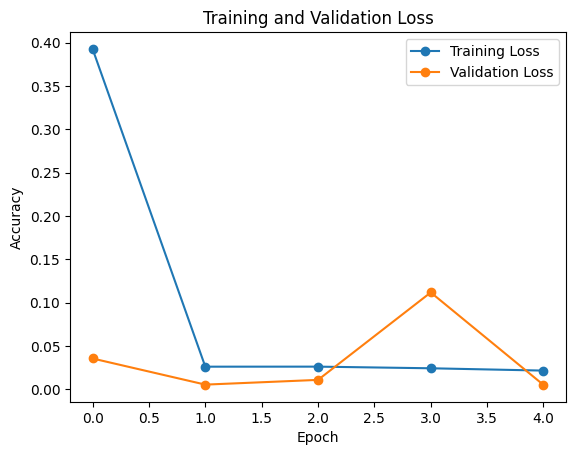

In [15]:
# Plot loss learning curve
plt.plot(no_aug_history.history['loss'], label='Training Loss', marker='o')
plt.plot(no_aug_history.history['val_loss'], label='Validation Loss',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluating and Visualising results
from keras.models import load_model

model = load_model("best_model_no_aug.keras")
print("Model without image augmentation loaded successfully.")

# Final evaluation
test_loss, test_acc = model.evaluate(validation_ds)
print(f"Final Test Accuracy: {test_acc:.2%}")
print(f"Final Test Loss: {test_loss:.6f}")

Model without image augmentation loaded successfully.
642/642 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9981 - loss: 0.0051
Final Test Accuracy: 99.81%
Final Test Loss: 0.005121


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 50, 50, 8)      │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 25, 25, 16)     │         1,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 12, 12, 32)     │         4,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 116)            │        29,812 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,649,742 (13.92 MB)

 Trainable params: 1,216,372 (4.64 MB)

 Non-trainable params: 624 (2.44 KB)

 Optimizer params: 2,432,746 (9.28 MB)

Testing the model's prediction on images not part of the learning phase

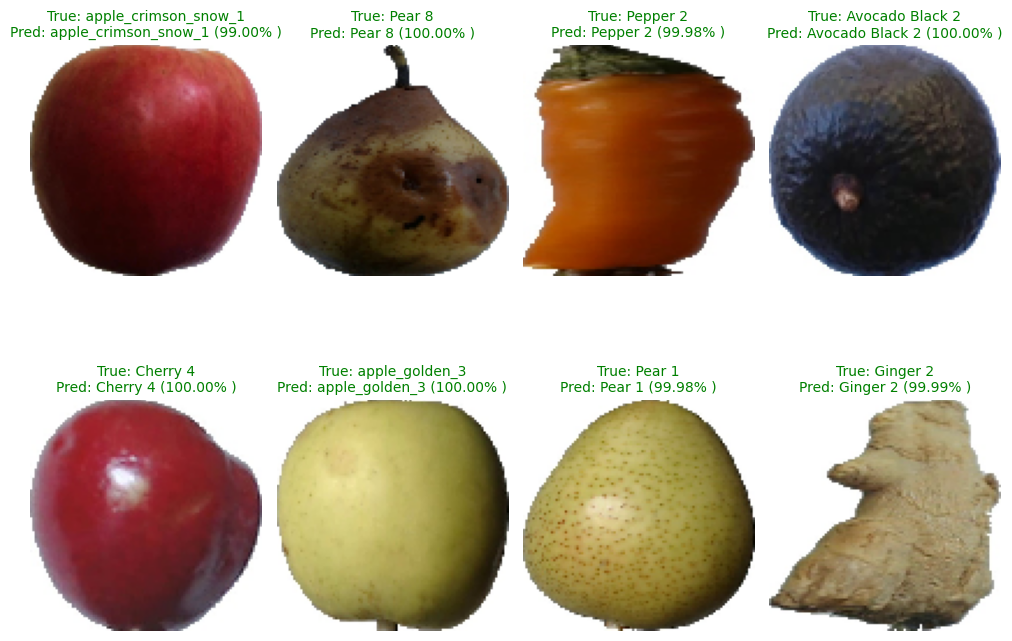

In [34]:
import random
from keras.preprocessing import image

# Get class names
class_names = validation_ds.class_names

def predict_image(img_path, model, class_names):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(100, 100))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Make prediction
    prediction = model.predict(img_array, verbose=0)[0]
    predicted_class = class_names[np.argmax(prediction)]
    confidence = prediction[np.argmax(prediction)]

    return img, predicted_class, confidence

# Select 8 random classes to test
random_classes = random.sample(class_names, 8)
plt.figure(figsize=(10, 8))

# Make predictions and plot
for i, class_name in enumerate(random_classes):
    class_path = os.path.join(path, testing_path, class_name)

    images = [f for f in os.listdir(class_path)
                if f.lower().endswith(('.png', '.jpg', '.jpeg'))]    
    
    img_path = os.path.join(class_path, random.choice(images))

    img, predicted_class, confidence = predict_image(
        img_path, model, class_names
    )
    plt.subplot(2, 4, i+1)
    plt.imshow(img)
    plt.axis('off')
    
    # Color code: green if correct, red if wrong
    color = 'green' if predicted_class == class_name else 'red'
    plt.title(
            f"True: {class_name}\nPred: {predicted_class} ({confidence:.2%} )", color=color, fontsize=10
        )
plt.tight_layout()
plt.show()


Confusion Matrix

642/642 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step


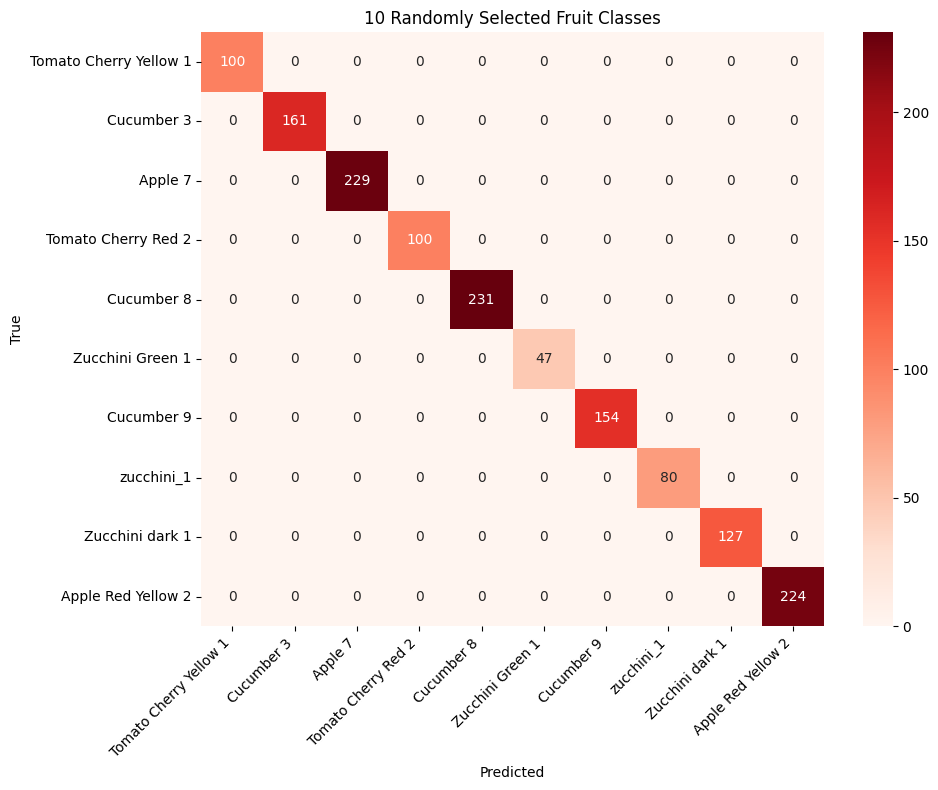

Classification Report:
                           precision    recall  f1-score   support

                 Apple 10     1.0000    1.0000    1.0000       231
                 Apple 11     1.0000    1.0000    1.0000       142
                 Apple 12     1.0000    1.0000    1.0000       154
                 Apple 13     1.0000    1.0000    1.0000       231
                 Apple 14     1.0000    1.0000    1.0000       154
                 Apple 17     1.0000    1.0000    1.0000       243
                 Apple 18     0.9758    1.0000    0.9878       242
                 Apple 19     1.0000    1.0000    1.0000       241
                  Apple 5     1.0000    1.0000    1.0000       146
                  Apple 7     1.0000    1.0000    1.0000       229
                  Apple 8     1.0000    1.0000    1.0000       228
                  Apple 9     1.0000    1.0000    1.0000       231
             Apple Core 1     1.0000    1.0000    1.0000       156
       Apple Red Yellow 2     1.0000  

In [58]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

y_true = []
for images, labels in validation_ds:
    y_true.extend(labels.numpy())

y_true = np.array(y_true)

# Predict
y_pred = model.predict(validation_ds, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Pick 10 random classes to display
random_class_indices = random.sample(
    range(len(class_names)), 10
)

class_names = np.array(validation_ds.class_names)
selected_class_names = class_names[random_class_indices]

mask = np.isin(y_true, random_class_indices)

y_true_subset = y_true[mask]
y_pred_subset = y_pred_classes[mask]

random_conf_matrix = confusion_matrix(
    y_true_subset,
    y_pred_subset,
    labels=random_class_indices
)

# Plot confusion matrix for selected classes
plt.figure(figsize=(10, 8))
sns.heatmap(
    random_conf_matrix,
    annot=True,
    fmt='d',
    cmap="Reds",
    xticklabels=selected_class_names,
    yticklabels=selected_class_names
)

plt.title("10 Randomly Selected Fruit Classes")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names, digits=4))

# Calculate overall accuracy
accuracy = np.sum(y_pred_classes == y_true) / len(y_true)
print(f"Overall Accuracy: {accuracy:.4f} ({accuracy:.2%})")

Image Augmentation

In [ ]:
from keras import layers
from keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast

# Model checkpoint callback to save the best model
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath="best_model.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    verbose=1
)

# Data Augmentation of random flip, rotation, zoom and contrast by 10% variation
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomZoom(0.1),
    RandomContrast(0.1),
])

# Define the CNN model with data augmentation
model = tf.keras.Sequential([
    InputLayer(shape=(100, 100, 3)),
    data_augmentation,  
    Rescaling(1./255), # Rescale pixel values to [0, 1] range for RGB coefficients 0-255
    
    conv_block(8),
    conv_block(16),
    conv_block(32),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(num_classes, activation='softmax') 
    ])

# Display the model's summary and architecture
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_5 (Sequential)       │ (None, 50, 50, 8)      │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_6 (Sequential)       │ (None, 25, 25, 16)     │         1,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_7 (Sequential)       │ (None, 12, 12, 32)     │         4,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 114)            │        29,298 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,216,482 (4.64 MB)

 Trainable params: 1,215,858 (4.64 MB)

 Non-trainable params: 624 (2.44 KB)

In [ ]:
# Visualise some samples from the training dataset with Image Augementation
plt.figure(figsize=(6,6))

for images, labels in train_ds.take(1):
    augmented_images = data_augmentation(images)

    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[labels[i]])

plt.tight_layout()
plt.show()

Building Model

In [ ]:
#Compiling the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=(validation_ds),
    epochs=20,
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

Epoch 1/20
1268/1269 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6598 - loss: 1.4321

KeyboardInterrupt: 

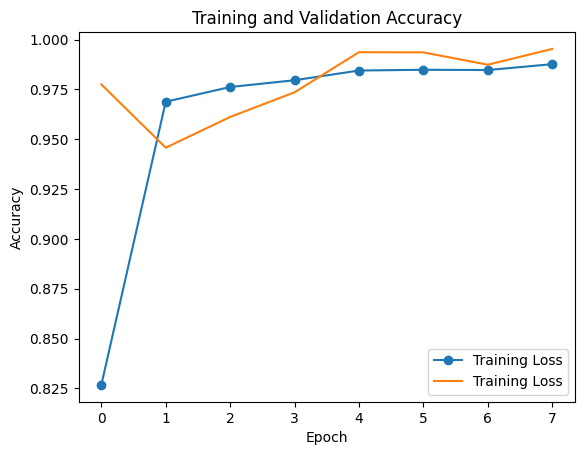

In [ ]:
# Plot accuracy learning curve
plt.plot(history.history['accuracy'], label='Training Loss', marker='o')
plt.plot(history.history['val_accuracy'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

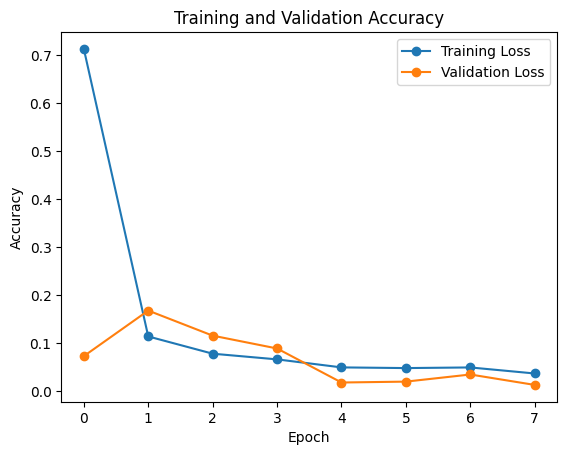

In [ ]:
# Plot loss learning curve
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Visualise and Evaulate results
from keras import load_model

model = load_model("best_model.keras")
print("Model with image augmentation loaded successfully.")

# Final evaluation
test_loss, test_acc = model.evaluate(validation_ds)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)